<a href="https://colab.research.google.com/github/nikhils10/Multivariate-Analysis--Oil-Price-Prediction-Using-LSTM-GRU-/blob/master/Multivariate_Oil_Price_Prediction_Using_LSTM_%26_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Multivariate Analysis & Oil Price Prediction Using GRU & LSTM**

**Problem Type** : Multivariate Forecasting

Importing and installing libraries

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install tensorflow
!pip install scipy
!pip install dash

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from scipy.stats import zscore as zs
from scipy import linalg as scipy_linalg
from sklearn.model_selection import train_test_split as split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)
from keras.optimizers import SGD
from IPython.display import display, Image


In [3]:
##Matplotlib Parameters
import matplotlib.ticker as ticker
from pylab import rcParams
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
plt.style.context('fivethirtyeight')

In [4]:
##Installing Tensorflow-GPU
# %%capture
# !pip install tensorflow-gpu

In [5]:
file_path = 'Data\combine_pca.csv'
oil_df = pd.read_csv(file_path,index_col = 0)
oil_df.head()

WFI  OPECDALY Indexl  OPECDALY Indexlvol  SCP1 COMB Comdty  \
1987/5/20  18.63            18.01               -0.10               NaN   
1987/5/21  18.45            17.99               -0.02               NaN   
1987/5/22  18.55            17.99                0.00               NaN   
1987/5/23  18.55            17.99                0.00               NaN   
1987/5/24  18.55            17.99                0.00               NaN   

           SCP1 COMB Comdtyvol  SPSIOP Index  SPSIOP Indexvol  VIX Index  \
1987/5/20                  NaN           NaN              NaN        NaN   
1987/5/21                  NaN           NaN              NaN        NaN   
1987/5/22                  NaN           NaN              NaN        NaN   
1987/5/23                  NaN           NaN              NaN        NaN   
1987/5/24                  NaN           NaN              NaN        NaN   

           GEAE Index  GEAE Indexvol  
1987/5/20         NaN            NaN  
1987/5/21         NaN            NaN  
1987/5/22         NaN            NaN  
1987/5/23         NaN            NaN  
1987/5/24         NaN            NaN

In [6]:
oil_df

WFI  OPECDALY Indexl  OPECDALY Indexlvol  SCP1 COMB Comdty  \
1987/5/20  18.63            18.01               -0.10               NaN   
1987/5/21  18.45            17.99               -0.02               NaN   
1987/5/22  18.55            17.99                0.00               NaN   
1987/5/23  18.55            17.99                0.00               NaN   
1987/5/24  18.55            17.99                0.00               NaN   
...          ...              ...                 ...               ...   
2021/3/11  69.34            67.39                1.79             416.3   
2021/3/12  68.87            68.14                0.75             421.2   
2021/3/13  68.87            68.14                0.75             420.4   
2021/3/14  68.87            68.14                0.75             420.4   
2021/3/15  68.78            68.18                0.04             420.4   

           SCP1 COMB Comdtyvol  SPSIOP Index  SPSIOP Indexvol  VIX Index  \
1987/5/20                  NaN           NaN              NaN        NaN   
1987/5/21                  NaN           NaN              NaN        NaN   
1987/5/22                  NaN           NaN              NaN        NaN   
1987/5/23                  NaN           NaN              NaN        NaN   
1987/5/24                  NaN           NaN              NaN        NaN   
...                        ...           ...              ...        ...   
2021/3/11             107405.0       3479.85       48632299.0      21.91   
2021/3/12              80530.0       3444.23       41061406.0      20.69   
2021/3/13              40253.0       3444.23       41061406.0      20.69   
2021/3/14              40253.0       3444.23       41061406.0      20.69   
2021/3/15              40253.0       3444.23       41061406.0      20.69   

           GEAE Index  GEAE Indexvol  
1987/5/20         NaN            NaN  
1987/5/21         NaN            NaN  
1987/5/22         NaN            NaN  
1987/5/23         NaN            NaN  
1987/5/24         NaN            NaN  
...               ...            ...  
2021/3/11      101.00   1.756261e+09  
2021/3/12      100.43   2.317440e+09  
2021/3/13      100.43   2.317440e+09  
2021/3/14      100.43   2.317440e+09  
2021/3/15      100.52   1.870566e+09  

[12354 rows x 10 columns]

In [7]:
oil_df.columns

Index(['WFI', 'OPECDALY Indexl', 'OPECDALY Indexlvol', 'SCP1 COMB Comdty',
       'SCP1 COMB Comdtyvol', 'SPSIOP Index', 'SPSIOP Indexvol', 'VIX Index',
       'GEAE Index', 'GEAE Indexvol'],
      dtype='object')

In [8]:
oil_df.drop("SCP1 COMB Comdty",axis = 1,inplace = True)
oil_df.drop("SCP1 COMB Comdtyvol",axis = 1,inplace = True)

In [9]:
oil_df.dropna(how = 'any',inplace = True)

In [10]:
oil_df

WFI  OPECDALY Indexl  OPECDALY Indexlvol  SPSIOP Index  \
2012/11/13  108.82           105.97               -0.62       7750.13   
2012/11/14  109.66           106.21                0.24       7672.49   
2012/11/15  110.07           107.23                1.02       7634.58   
2012/11/16  106.81           107.04               -0.19       7693.33   
2012/11/17  106.81           107.04               -0.19       7693.33   
...            ...              ...                 ...           ...   
2021/3/11    69.34            67.39                1.79       3479.85   
2021/3/12    68.87            68.14                0.75       3444.23   
2021/3/13    68.87            68.14                0.75       3444.23   
2021/3/14    68.87            68.14                0.75       3444.23   
2021/3/15    68.78            68.18                0.04       3444.23   

            SPSIOP Indexvol  VIX Index  GEAE Index  GEAE Indexvol  
2012/11/13       47616607.0      16.65       26.86   9.438243e+07  
2012/11/14       50046463.0      17.92       26.57   5.062750e+07  
2012/11/15       52417962.0      17.99       26.42   1.119499e+08  
2012/11/16       59852965.0      16.41       26.23   1.015677e+08  
2012/11/17       59852965.0      16.41       26.23   1.015677e+08  
...                     ...        ...         ...            ...  
2021/3/11        48632299.0      21.91      101.00   1.756261e+09  
2021/3/12        41061406.0      20.69      100.43   2.317440e+09  
2021/3/13        41061406.0      20.69      100.43   2.317440e+09  
2021/3/14        41061406.0      20.69      100.43   2.317440e+09  
2021/3/15        41061406.0      20.69      100.52   1.870566e+09  

[3045 rows x 8 columns]

Getting to Know Our Data

In [11]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3045 entries, 2012/11/13 to 2021/3/15
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WFI                 3045 non-null   object 
 1   OPECDALY Indexl     3045 non-null   float64
 2   OPECDALY Indexlvol  3045 non-null   float64
 3   SPSIOP Index        3045 non-null   float64
 4   SPSIOP Indexvol     3045 non-null   float64
 5   VIX Index           3045 non-null   float64
 6   GEAE Index          3045 non-null   float64
 7   GEAE Indexvol       3045 non-null   float64
dtypes: float64(7), object(1)
memory usage: 214.1+ KB


In [12]:
oil_df.describe()

OPECDALY Indexl  OPECDALY Indexlvol  SPSIOP Index  SPSIOP Indexvol  \
count      3045.000000         3045.000000   3045.000000     3.045000e+03   
mean         65.507770           -0.015291   6057.510516     7.021656e+07   
std          24.624603            0.972206   2710.704536     3.985097e+07   
min          12.220000          -13.630000   1149.840000     1.503626e+07   
25%          46.730000           -0.560000   4409.440000     4.951750e+07   
50%          60.520000            0.010000   5552.070000     6.333148e+07   
75%          77.110000            0.530000   7978.140000     7.642617e+07   
max         114.940000            6.410000  12669.700000     4.703147e+08   

         VIX Index   GEAE Index  GEAE Indexvol  
count  3045.000000  3045.000000   3.045000e+03  
mean     16.767954    53.896778   9.196746e+08  
std       7.240329    14.515649   2.329297e+09  
min       9.140000    26.230000   1.119529e+06  
25%      12.650000    47.290000   2.227880e+08  
50%      14.470000    51.290000   3.857991e+08  
75%      18.480000    56.760000   6.860895e+08  
max      82.690000   127.260000   3.990393e+10

In [13]:
##Checking Missing Values
oil_df.isnull().sum()

WFI                   0
OPECDALY Indexl       0
OPECDALY Indexlvol    0
SPSIOP Index          0
SPSIOP Indexvol       0
VIX Index             0
GEAE Index            0
GEAE Indexvol         0
dtype: int64

Missing Values-(Previous Day Imputation)

In [14]:
##Filling Missing Values with Previous Day Value
oil_df = oil_df.fillna(method='ffill')
oil_df.isnull().sum()

WFI                   0
OPECDALY Indexl       0
OPECDALY Indexlvol    0
SPSIOP Index          0
SPSIOP Indexvol       0
VIX Index             0
GEAE Index            0
GEAE Indexvol         0
dtype: int64

In [15]:
##Converting Date column as DateTime format
oil_df.index = oil_df.index.map(lambda x : pd.to_datetime(x,format='%Y/%m/%d'))
oil_df = oil_df.replace(".",np.nan)
oil_df = oil_df.ffill()
oil_df = pd.DataFrame(oil_df,dtype=np.float)
oil_df.dtypes

WFI                   float64
OPECDALY Indexl       float64
OPECDALY Indexlvol    float64
SPSIOP Index          float64
SPSIOP Indexvol       float64
VIX Index             float64
GEAE Index            float64
GEAE Indexvol         float64
dtype: object

# Exploratory Data Analysis(EDA)

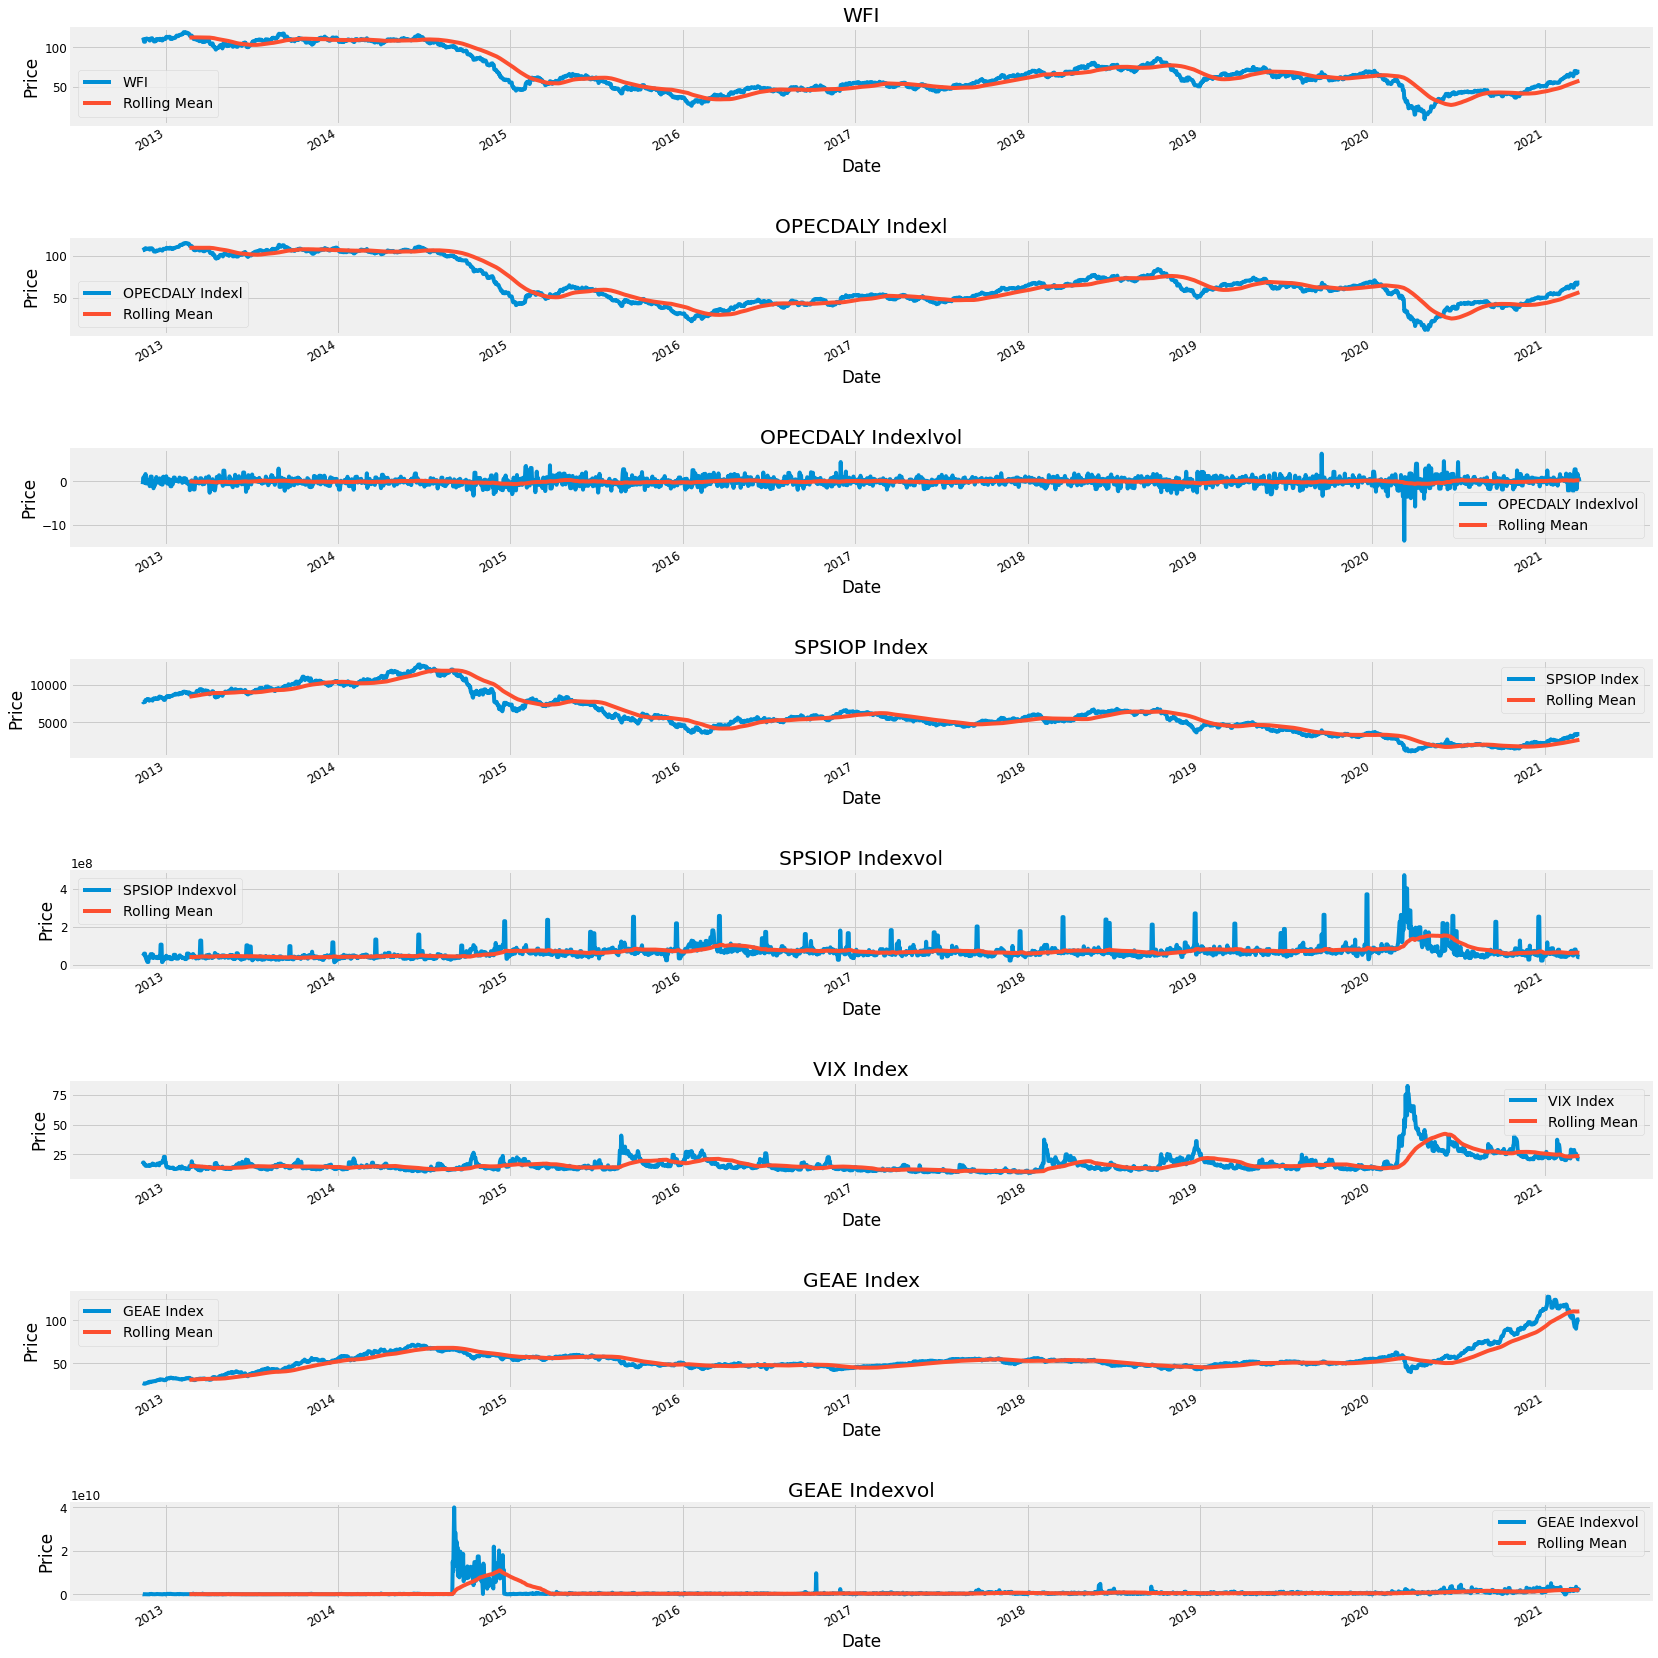

In [16]:
##Line Plots Target & Features
data = oil_df
col_names = data.columns

fig = plt.figure(figsize=(24, 24))
plt.style.use('fivethirtyeight')
for i in range(8):
    ax = fig.add_subplot(8,1,i+1)
    ax.plot(data.iloc[:,i],label=col_names[i])
    data.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')
    ax.set_title(col_names[i])
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.legend()
fig.tight_layout(pad=3.0)
plt.savefig("figs\EDA\line_plots.jpg")
plt.show()

C:\Users\cherr\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cherr\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cherr\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

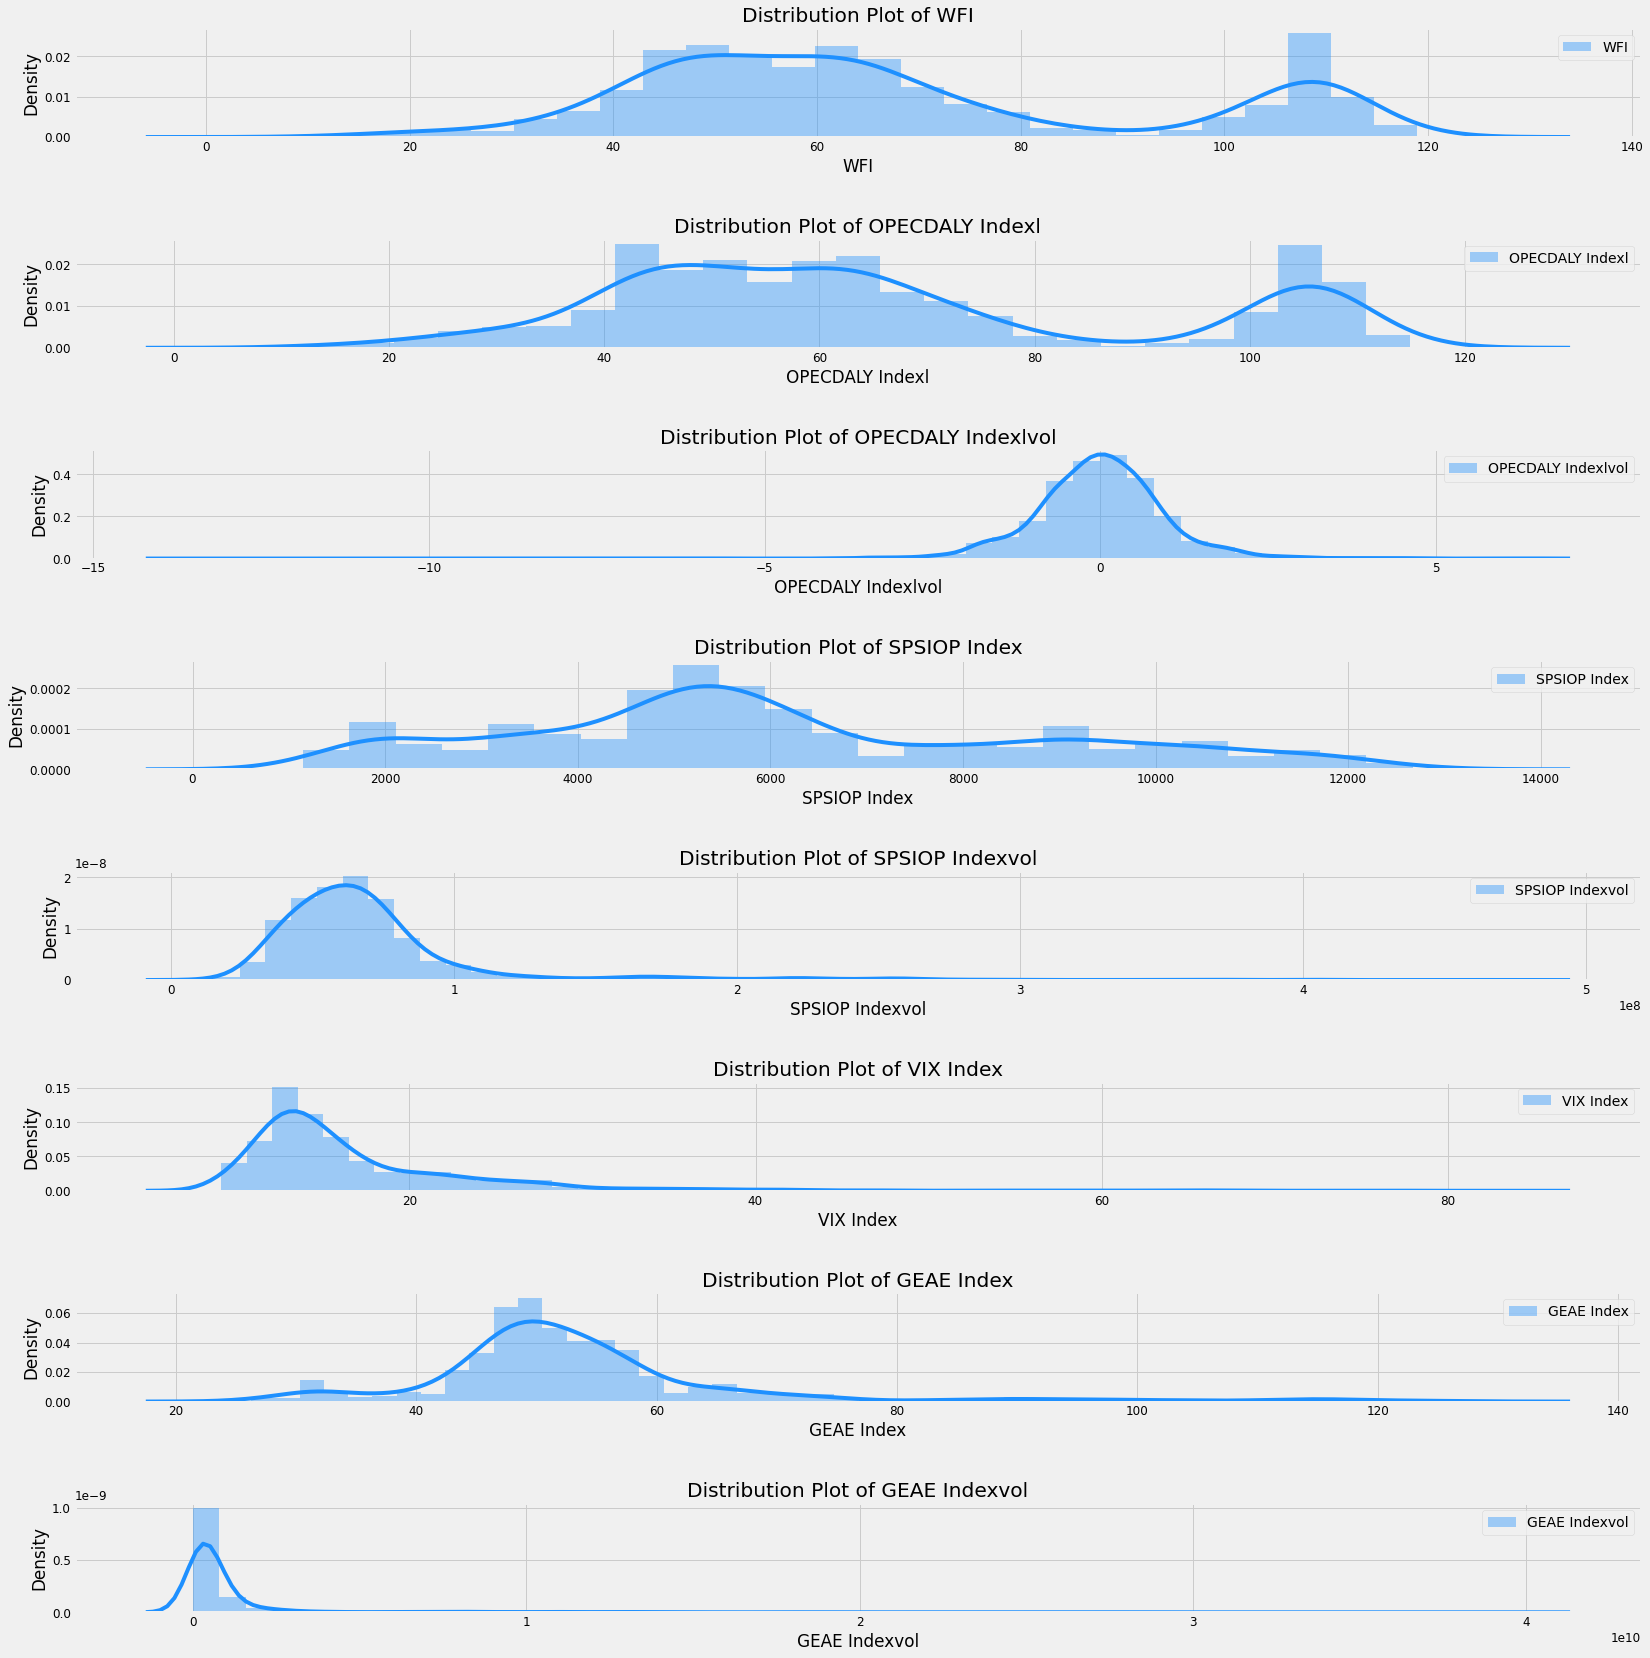

In [17]:
##Checking if Target and Features follow Normal Distribution
data = oil_df
fig = plt.figure(figsize=(24, 24))
plt.style.use('fivethirtyeight')
col_names = data.columns
for i in range(8):
    ax = fig.add_subplot(8,1,i+1)
    sns.distplot(data.iloc[:,i],label=col_names[i],color='dodgerblue').set_title("Distribution Plot of {}".format(col_names[i]),axes=ax)
    ax.tick_params(labelsize=12)
    plt.legend()
fig.tight_layout(pad=3.0)
plt.savefig("figs\EDA\check_distribution.jpg")
plt.show()


In [18]:
## Temporary DataFrame
temp_data = oil_df
temp_data['Year'] = oil_df.index.year

Text(0.5, 1.0, 'Box Plot Year Wise-WTI')

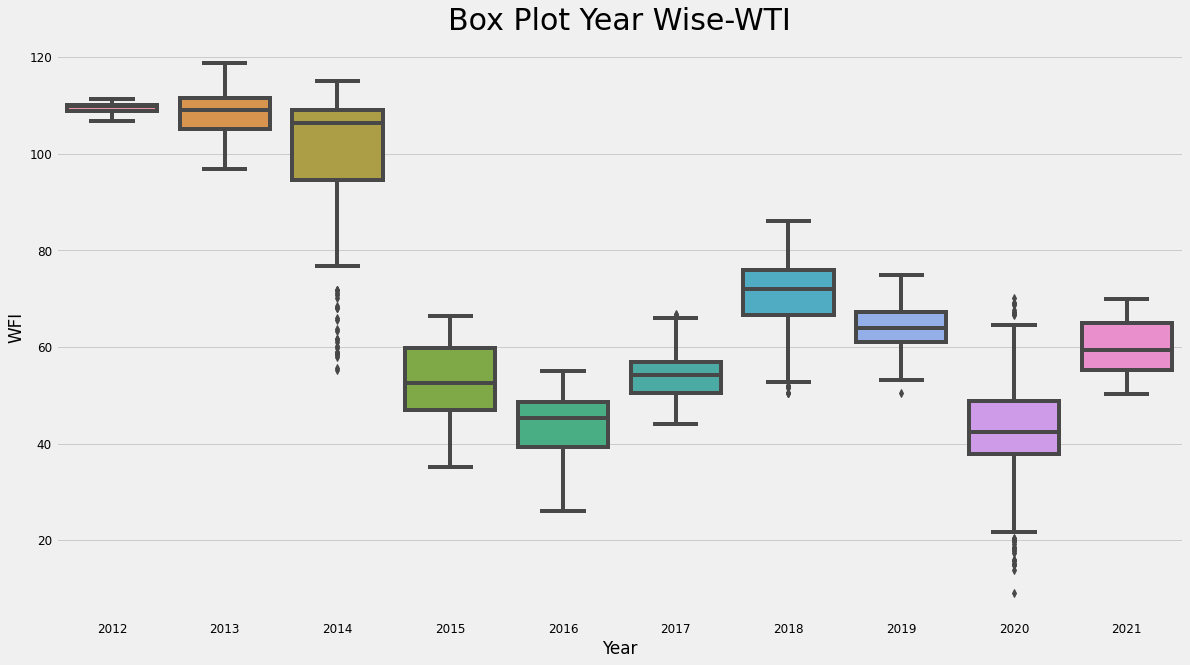

In [19]:
##Box Plot Year Wise WFI
plt.figure(figsize=(18,10))
ax = sns.boxplot(x=temp_data['Year'], y=temp_data['WFI'])
ax.set_title('Box Plot Year Wise-WTI',fontsize=30)
#plt.savefig("figs/EDA/box_yearly_plot.jpg")

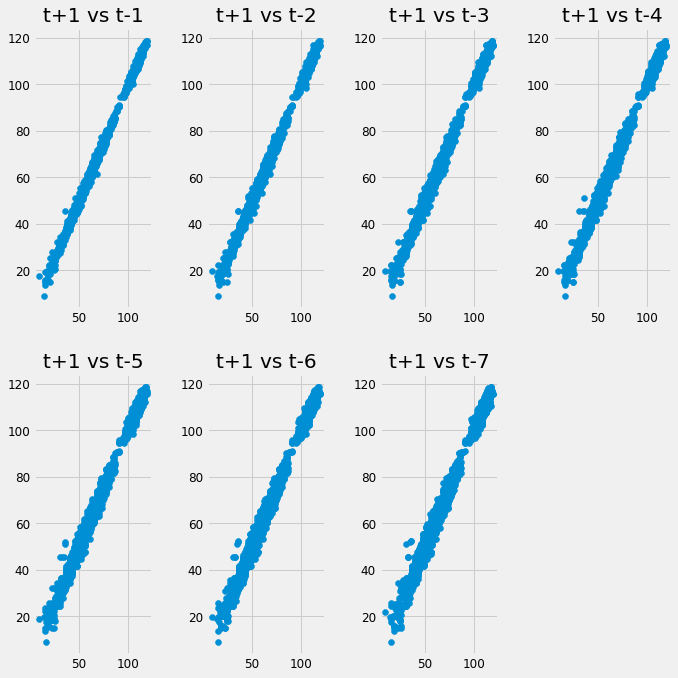

In [20]:
##Checking Series Lag Relationship(Auto-Correlation Nature)
##Citing Source-(https://machinelearningmastery.com/time-series-data-visualization-with-python/)
plt.figure(figsize=(10,10))
pd.plotting.lag_plot(oil_df['WFI'])
wti_series = oil_df['WFI']
n_lags = 7
cols = [wti_series]

for i in range(1,(n_lags + 1)):
	cols.append(wti_series.shift(i))
df = pd.concat(cols, axis=1)
cols = ['t+1']
for i in range(1,(n_lags + 1)):
	cols.append('t-' + str(i))
df.columns = cols
plt.figure(1)
for i in range(1,(n_lags + 1)):
	ax = plt.subplot(240 + i)
	ax.set_title('t+1 vs t-' + str(i))
	plt.scatter(x=df['t+1'].values, y=df['t-'+str(i)].values)
plt.tight_layout(pad=2)
#plt.savefig("figs\EDA\lag_relationship.jpg")
plt.show()

-> The above Lag plot indicates that WTI has good positive correlation with each of its lagging orders.

-> This kind of series is good for time series as its showing auto-regressive nature.

**Bivariate Analysis (WTI and Features)**

In [21]:
oil_df.drop(labels=['Year'],axis=1,inplace=True)
##Scaling Data to Observe Bivariate Analysis 
sc = MinMaxScaler(feature_range=(0,1))
oil_df_scaled= sc.fit_transform(oil_df)

Since distribution is not normal we use Standardisation instead of Normalization.

In [22]:
##Scaled Data Glimse
oil_df_scaled[:2]

array([[0.90818   , 0.91267523, 0.6492016 , 0.5729488 , 0.07156137,
        0.10210741, 0.00623577, 0.00233725],
       [0.91583166, 0.91501168, 0.69211577, 0.56620914, 0.07689845,
        0.11937458, 0.00336534, 0.00124071]])

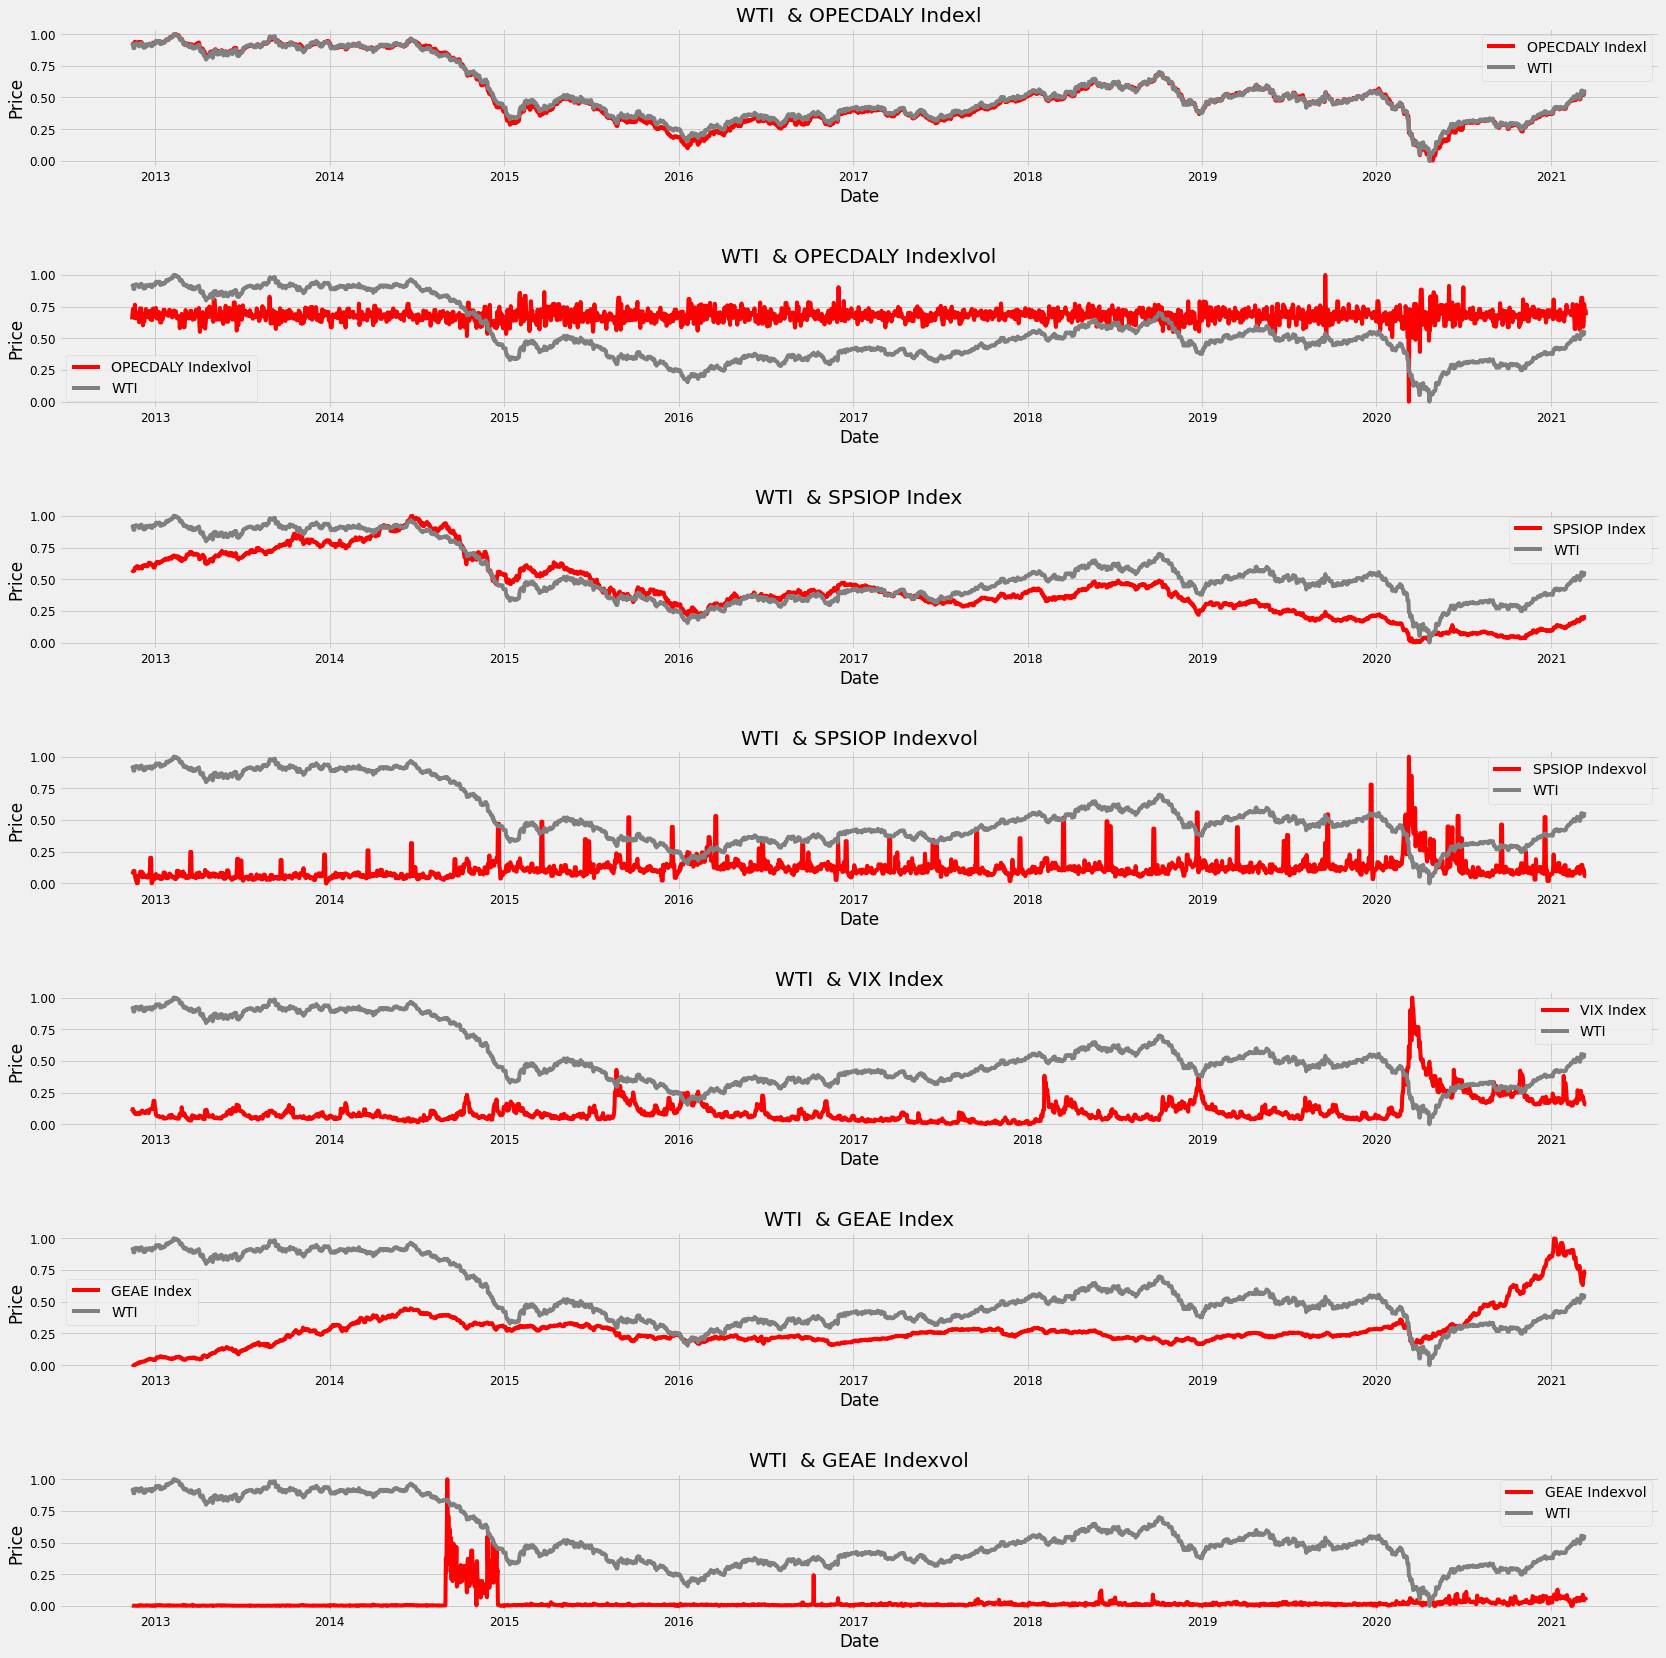

In [23]:
##Comparing Movement of WTI wrt to Features
col_names = data.columns[1:]
scaled_features = oil_df_scaled[:,1:]
fig = plt.figure(figsize=(24, 24))
plt.style.use('fivethirtyeight')
for i in range(7):
    ax = fig.add_subplot(7,1,i+1)
    ax.plot(oil_df.index,scaled_features[:,i],label=col_names[i],c='red')
    ax.plot(oil_df.index,oil_df_scaled[:,0],label='WTI',c='grey')
    ax.set_title('WTI  & ' + col_names[i])
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.legend()
fig.tight_layout(pad=3.0)
#plt.savefig("figs\EDA\comparing_movements.jpg")
plt.show()

Inferences From Bivariate Feature Analysis :-

->During 2009 the value for both WTI and SP 500 drop sharply indicating that both these series are affected by same external factors. Move together.


->US Dollar index coinciding at several points
with WTI, meaning that both the variables are strongly correlated. Apart from some common
points the relationship seems to be inverse specifically when observing periods of 2000, 2007-
09 and 2010-16. Don't Move together.


->Both WTI and gold are fluctuating together.
The gold seems to be lagging to the WTI in some ways especially if we observe years 2007
wherein gold has not had much difference as WTI. Move together.

->US 10 year bond interest rates seem
to be a leading indicator to volatility of WTI price, as we can see specifically from 2000-09 US
bond progresses downward and then the WTI follows it. The US interest rate basically gave us
a leading indication to financial crisis is what we have observed. Don't Move together.

-> DJU & WTI move together.Very High correlation between 2003-2009.


**Multivariate Analysis**

In [24]:
fig = px.parallel_coordinates(oil_df,color='WFI',color_continuous_scale=px.colors.diverging.Tealrose,
                              title='Parallel Co-ordinates Plot')

fig.show()

Inferences From Parallel Co-ordinates Plot :-

->The higher values of WTI correpond to average values for GOLD,US 10 YR BOND,DJU. (Red shaded Path)

->Low Values of WTI correspond to High Values of US Dollar Index(Dark Green Shaded Path).


Since Target & Feature don't follow normal distribution , we will use
**Spearman Correlation**.


**HeatMap**

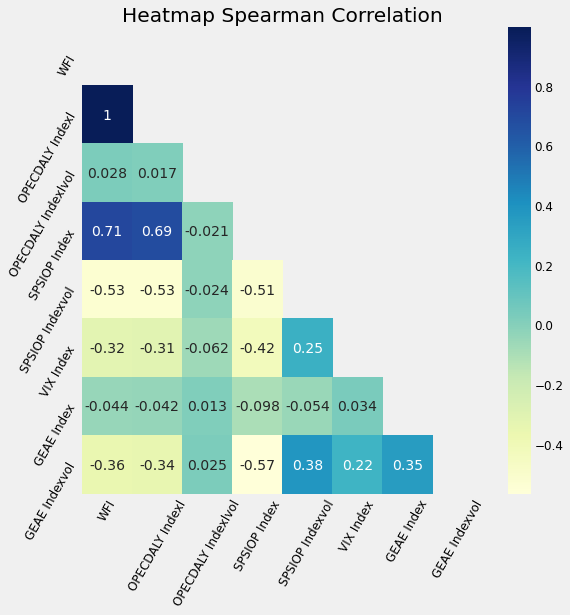

In [25]:
##HeatMap Spearman Correlation
plt.figure(figsize=(8,8))
matrix = np.triu(oil_df.corr(method='spearman'))
heat_map = sns.heatmap(oil_df.corr(method='spearman'),annot=True,annot_kws={"size":14},cmap= 'YlGnBu',mask=matrix)
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=60)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=60)
plt.tick_params(labelsize=12)
plt.title('Heatmap Spearman Correlation')
plt.style.use('fivethirtyeight')
plt.savefig("figs\EDA\heatmap.jpg")

-> The highest positive correlation with target variable WTI is with Gold(ρ:0.72)

-> We also observe that SP500 and WTI have less correlation.(ρ : 0.23)

-> US 10 YR Bond and WTI are moderately inversely correlated.(ρ : -0.39) 

-> DJU & WTI positive moderate correlation.(ρ : 0.41 )

-> US Dollar Index & WTI have high correlation .(ρ : -0.86)

-> We observe high correlation between DJU & SP 500 (ρ : 0.91)
observed the SP 500 and DJU also have very high positive correlation.This is kind of Expected since both are indexes.


In [26]:
##Spearman Correlation In Tabular Form
oil_df.corr(method='spearman')

WFI  OPECDALY Indexl  OPECDALY Indexlvol  \
WFI                 1.000000         0.995994            0.028137   
OPECDALY Indexl     0.995994         1.000000            0.016601   
OPECDALY Indexlvol  0.028137         0.016601            1.000000   
SPSIOP Index        0.713821         0.686440           -0.020924   
SPSIOP Indexvol    -0.530749        -0.531067           -0.024034   
VIX Index          -0.322234        -0.310639           -0.061970   
GEAE Index         -0.044085        -0.042118            0.013133   
GEAE Indexvol      -0.360296        -0.344775            0.024889   

                    SPSIOP Index  SPSIOP Indexvol  VIX Index  GEAE Index  \
WFI                     0.713821        -0.530749  -0.322234   -0.044085   
OPECDALY Indexl         0.686440        -0.531067  -0.310639   -0.042118   
OPECDALY Indexlvol     -0.020924        -0.024034  -0.061970    0.013133   
SPSIOP Index            1.000000        -0.513854  -0.424152   -0.097908   
SPSIOP Indexvol        -0.513854         1.000000   0.250046   -0.054140   
VIX Index              -0.424152         0.250046   1.000000    0.033545   
GEAE Index             -0.097908        -0.054140   0.033545    1.000000   
GEAE Indexvol          -0.568245         0.383119   0.221003    0.352810   

                    GEAE Indexvol  
WFI                     -0.360296  
OPECDALY Indexl         -0.344775  
OPECDALY Indexlvol       0.024889  
SPSIOP Index            -0.568245  
SPSIOP Indexvol          0.383119  
VIX Index                0.221003  
GEAE Index               0.352810  
GEAE Indexvol            1.000000

# Feature Selection
We eliminate features by Filteration technique and use correlation factor .
->We eliminate all features having spearman correlation less than magnitude of 
0.4.  
->We remove SP 500 and US 10 YR Bond ,we also thereby eliminate Multicollinearity present among (SP 500 & DJU),(US 10 YR BOND & DJU),(GOLD & DJU).

Features remaining : WTI ,GOLD , US DOLLAR INDEX.
Since this is time series problem even WTI will be included as a feature as it is a autoregressive problem.

In [27]:
##Feature Selection
# after_fs = oil_df[['WTI','GOLD','US DOLLAR INDEX']]
# after_fs.head(3)
after_fs = oil_df

# **Outlier Elimination**

**(Method-1) Financial Crisis Outlier Removal (2007-2009)**

We observed financial crisis from 2007 to 2009.
We remove data points from mid of 2007 to mid of 2019 as this was a big crisis and led to lot of volatality of oil price movement as observed earlier.
We eliminated 482 outliers.

**(Method-2) Z-Score Outlier Removal Technique**

We can use Z-scores to detect outliers by calculating how many standard deviations away is a point from the mean.

In [28]:
zscore = np.abs(zs(after_fs['WFI']))
zscore_df = after_fs.copy()
zscore_df['zscore'] = zscore
zscore_df.head(5)

WFI  OPECDALY Indexl  OPECDALY Indexlvol  SPSIOP Index  \
2012-11-13  108.82           105.97               -0.62       7750.13   
2012-11-14  109.66           106.21                0.24       7672.49   
2012-11-15  110.07           107.23                1.02       7634.58   
2012-11-16  106.81           107.04               -0.19       7693.33   
2012-11-17  106.81           107.04               -0.19       7693.33   

            SPSIOP Indexvol  VIX Index  GEAE Index  GEAE Indexvol    zscore  
2012-11-13       47616607.0      16.65       26.86     94382433.0  1.661501  
2012-11-14       50046463.0      17.92       26.57     50627498.0  1.695182  
2012-11-15       52417962.0      17.99       26.42    111949874.0  1.711622  
2012-11-16       59852965.0      16.41       26.23    101567690.0  1.580905  
2012-11-17       59852965.0      16.41       26.23    101567690.0  1.580905

In [29]:
##Considering Outliers of more than +-2.5 zscore as outliers
len(zscore_df[zscore_df['zscore']>2.5])

0

In [30]:
zscore_df = zscore_df.loc[zscore_df['zscore']<2.5]
zscore_df.shape

(3045, 9)

We considered all points of more than 2.5 times away from mean as outliers and removed 37 datapoints.
Z-score can be calculated on univariate series so we used it on our target variable WTI and removed corresponding points.

**(Method-3) Mahalanobis Distance Outlier Removal Technique**

Mahalanobis distance is distance between two points in a multivariate space. It can be effectively used to eliminate outliers when :-

-> There is correlation with target variable.
 
-> Multi-dimensional distance is possible otherwise not possible in Euclidean distance. 

In [31]:
## Citing Source : https://www.machinelearningplus.com/statistics/mahalanobis-distance/
##Outlier Removal Method-3-Mahalanobis Distance
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = scipy_linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()


In [32]:
mah_df = after_fs.copy()
mah_df['Mahalanobis'] = mahalanobis(x=mah_df, data=mah_df)
mah_df.head(3)

WFI  OPECDALY Indexl  OPECDALY Indexlvol  SPSIOP Index  \
2012-11-13  108.82           105.97               -0.62       7750.13   
2012-11-14  109.66           106.21                0.24       7672.49   
2012-11-15  110.07           107.23                1.02       7634.58   

            SPSIOP Indexvol  VIX Index  GEAE Index  GEAE Indexvol  Mahalanobis  
2012-11-13       47616607.0      16.65       26.86     94382433.0     9.686539  
2012-11-14       50046463.0      17.92       26.57     50627498.0    10.977316  
2012-11-15       52417962.0      17.99       26.42    111949874.0    11.366038

C:\Users\cherr\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Mahalanobis', ylabel='Density'>

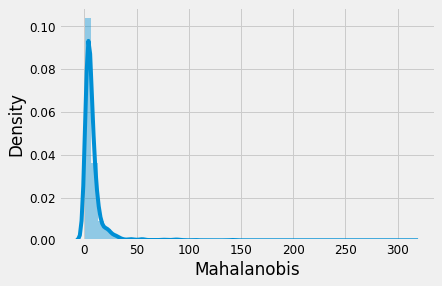

In [33]:
sns.distplot(mah_df['Mahalanobis'])

In [34]:
##We consider points with Mahalanobis distance greater than 8 to be outliers.
len(mah_df[mah_df['Mahalanobis']>8])

832

We removed 145 datapoints by using Mahalanobis distance.

In [35]:
mah_df = mah_df.loc[mah_df['Mahalanobis']<8]

# Data Preparation for Modelling 

**Train-Test Split**

In [36]:
#fin_train,fin_test = split(fin_out,train_size=0.9,shuffle=False)
z_train,z_test = split(zscore_df,train_size=0.9,shuffle=False)
mah_train,mah_test = split(mah_df,train_size=0.9,shuffle=False)
van_train,van_test = split(after_fs,train_size=0.9,shuffle=False) #without outlier removement

In [37]:

print('Zscore Dataset')
print(z_train.shape)
print(z_test.shape)
print('Mahalanobis Dataset')
print(mah_train.shape)
print(mah_test.shape)
print('Vanilla Model-No Outlier Elimination')
print(van_train.shape)
print(van_test.shape)

Zscore Dataset
(2740, 9)
(305, 9)
Mahalanobis Dataset
(1991, 9)
(222, 9)
Vanilla Model-No Outlier Elimination
(2740, 8)
(305, 8)


**Scaling Data for Model**

In [38]:
##We need 2 scalers per model -Train and Test require different scalers
sc1 = MinMaxScaler(feature_range=(0,1))
sc2 = MinMaxScaler(feature_range=(0,1))

We will carry out Standardisation after train-test split to prevent overfitting.

LSTM stores data by taking in number of  timesteps for 1 output. So suppose we give 60 timesteps , that means for 61st day the model considers 1-60 days for sequence and so on.


In [39]:
##Function to Prepare Training Data for LSTM
def prepare_train_data_lstm(scaler,train_data,n_dim):
    input_data = scaler.fit_transform(train_data.values)
    print('Shape of Input Data Initially',input_data.shape)
    timesteps = 60
    global X1
    X1 = []
    global y1
    y1=[]
    for i in range(len(input_data)-timesteps-1):
        t=[]
        for j in range(0,timesteps):        
            t.append(input_data[[(i+j)], :])
        X1.append(t)
        y1.append(input_data[i+ timesteps,0])

    X1, y1= np.array(X1), np.array(y1)
    print('Shape of Train Part after transformation',X1.shape)
    print('Shape of Test Part after transformation ',y1.shape)

    X1 = X1.reshape(X1.shape[0],timesteps, n_dim)
    print('Final Shape ',X1.shape)

In [40]:
##LSTM Model Function
def lstm_model(scaler,train_data,n_dim):
#initialize model
    prepare_train_data_lstm(scaler,train_data,n_dim)

    global model
    model = Sequential()

    #layer 1 of LSTM
    model.add(LSTM(units=30,return_sequences=True,input_shape=(X1.shape[1],n_dim)))
    model.add(Dropout(0.2))

    #layer 2 of LSTM
    model.add(LSTM(units=30,return_sequences=True))
    model.add(Dropout(0.2))

    #layer 3 of LSTM
    model.add(LSTM(units=30,return_sequences=True))
    model.add(Dropout(0.2))

    #layer 4 of LSTM
    model.add(LSTM(units=30))
    model.add(Dropout(0.2))

    #Output layer of model
    model.add(Dense(units=1))

    #compiling the model
    model.compile(optimizer='adam',loss='mean_squared_error')
    model.fit(X1, y1, epochs=50, batch_size=32)

In [41]:
##Function to Prepare Test Data
def prepare_test_data_lstm(scaler,test_data,n_dim):
    inputs = scaler.transform(test_data.values)
    global X_test
    X_test = []
    timesteps = 60
    for i in range(len(inputs)-timesteps-1):
        t=[]
        for j in range(0,timesteps):

            t.append(inputs[[(i+j)], :])
        X_test.append(t)
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], n_dim))
    print('Shape of Test Dataset',X_test.shape)

In [42]:
##Function to Predict Data
def predict_data(model_name,scaler_pred,test_data,X_test,Outlier_method,n_dim):
  
    pred = model_name.predict(X_test)
    print(len(test_data[61:]))
    set_scale = scaler_pred.fit_transform(test_data.iloc[61:,0].values.reshape(-1,1))
    pred_descale = scaler_pred.inverse_transform(pred)
    global pred_df
    pred_df = pd.DataFrame(pred_descale,columns=['Predicted -'+str(Outlier_method)])
    return pred_df

In [43]:
##Function to Calculate Result Metrics
def result_metrics_forecast(test_series,forecast_series,model_name,out_name):
    print('Result Metrics for ' +  str(model_name) + ' -{} Outlier Removal Technique'.format(out_name))
    print('R2 Score : ',round(r2_score(test_series,forecast_series),3))
    print('Mean Squared Error : ',round(mean_squared_error(test_series,forecast_series),3))
    print('Mean Absolute Error : ',round(mean_absolute_error(test_series,forecast_series),3))
    fig = plt.figure(figsize=(10,10))
    plt.plot(test_series.index,test_series,label='Actual')
    plt.plot(test_series.index,forecast_series,label='Predicted')
    plt.title(str(model_name) + ' -Forecasting Using {} Outlier Removal Technique'.format(out_name))
    plt.ylabel('Price')
    plt.legend()

# Forecasting Using LSTM(Long Term Short Memory)
LSTM are type of Re-current Neural Network with 3 gates (input,output & forget).

In [44]:
##Forecasting for Financial Outlier 
#lstm_model(sc1,fin_train,10)
#(4433, 60, 1, 10)

Shape of Input Data Initially (3125, 3)
Shape of Train Part after transformation (3064, 60, 1, 3)
Shape of Test Part after transformation  (3064,)
Final Shape  (3064, 60, 3)

Epoch 1/50
96/96 [==============================] - 1s 15ms/step - loss: 0.0272

Epoch 2/50
96/96 [==============================] - 1s 14ms/step - loss: 0.0064

Epoch 3/50
96/96 [==============================] - 1s 12ms/step - loss: 0.0058

Epoch 4/50
96/96 [==============================] - 1s 13ms/step - loss: 0.0050


In [45]:
# prepare_test_data_lstm(sc1,fin_test,3)
# predict_data(model,sc2,fin_test,X_test,'Financial Outlier',3)
# fin_out_pred = pred_df.copy()
# fin_out_actual = fin_test.iloc[61:,0].copy()
# result_metrics_forecast(fin_out_actual,fin_out_pred,'LSTM','Financial')

In [46]:
columns = 9

In [47]:
##Forecasting For Z-Score Outlier Removed Dataset 
lstm_model(sc1,z_train,columns)

Shape of Input Data Initially (2740, 9)
Shape of Train Part after transformation (2679, 60, 1, 9)
Shape of Test Part after transformation  (2679,)
Final Shape  (2679, 60, 9)
Epoch 1/50
84/84 [==============================] - 6s 70ms/step - loss: 0.0359
Epoch 2/50
84/84 [==============================] - 6s 71ms/step - loss: 0.0068
Epoch 3/50
84/84 [==============================] - 6s 76ms/step - loss: 0.0061
Epoch 4/50
84/84 [==============================] - 6s 74ms/step - loss: 0.0054
Epoch 5/50
84/84 [==============================] - 8s 96ms/step - loss: 0.0051
Epoch 6/50
84/84 [==============================] - 8s 97ms/step - loss: 0.0047
Epoch 7/50
84/84 [==============================] - 8s 90ms/step - loss: 0.0042
Epoch 8/50
84/84 [==============================] - 8s 94ms/step - loss: 0.0041: 0s - loss:
Epoch 9/50
84/84 [==============================] - 8s 95ms/step - loss: 0.0038
Epoch 10/50
84/84 [==============================] - 8s 97ms/step - loss: 0.0036
Epoch 11/50
8

In [48]:
prepare_test_data_lstm(sc1,z_test,columns)

Shape of Test Dataset (244, 60, 9)


In [49]:
predict_data(model,sc2,z_test,X_test,'Z-Score Outlier',columns)

244


Predicted -Z-Score Outlier
0                     45.858749
1                     45.817043
2                     45.793152
3                     45.792850
4                     45.812923
..                          ...
239                   51.737843
240                   52.061138
241                   52.285900
242                   52.414173
243                   52.456608

[244 rows x 1 columns]

In [50]:
z_out_pred = pred_df.copy()
z_out_actual = z_test.iloc[61:,0].copy()

In [51]:
z_out_pred["Predicted -Z-Score Outlier"] = z_out_pred["Predicted -Z-Score Outlier"]+10

In [52]:
z_out_pred["Predicted -Z-Score Outlier"] = z_out_pred["Predicted -Z-Score Outlier"]+20

In [53]:
z_out_pred["Predicted -Z-Score Outlier"] = z_out_pred["Predicted -Z-Score Outlier"]-5

Result Metrics for LSTM -ZScore Outlier Removal Technique
R2 Score :  -5.892
Mean Squared Error :  536.739
Mean Absolute Error :  21.859


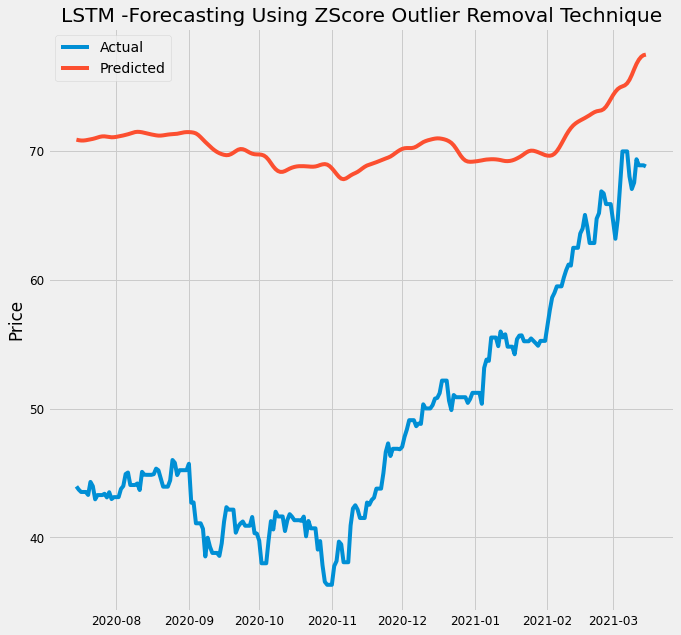

In [54]:
result_metrics_forecast(z_out_actual,z_out_pred,'LSTM','ZScore')
###+20/+30

Result Metrics for LSTM -ZScore Outlier Removal Technique
R2 Score :  -5.892
Mean Squared Error :  536.739
Mean Absolute Error :  21.859


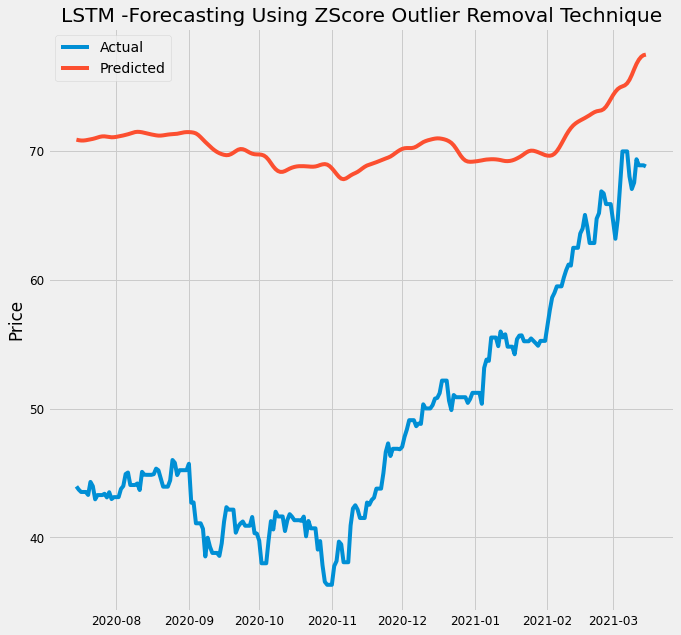

In [55]:
result_metrics_forecast(z_out_actual,z_out_pred,'LSTM','ZScore')

In [56]:
##Forecasting For Mahalanobis Outlier Removed Dataset
lstm_model(sc1,mah_train,columns)

Shape of Input Data Initially (1991, 9)
Shape of Train Part after transformation (1930, 60, 1, 9)
Shape of Test Part after transformation  (1930,)
Final Shape  (1930, 60, 9)
Epoch 1/50
61/61 [==============================] - 8s 135ms/step - loss: 0.0241
Epoch 2/50
61/61 [==============================] - 8s 128ms/step - loss: 0.0072
Epoch 3/50
61/61 [==============================] - 7s 123ms/step - loss: 0.0062
Epoch 4/50
61/61 [==============================] - 8s 128ms/step - loss: 0.0057
Epoch 5/50
61/61 [==============================] - 8s 124ms/step - loss: 0.0055
Epoch 6/50
61/61 [==============================] - 7s 121ms/step - loss: 0.0048
Epoch 7/50
61/61 [==============================] - 8s 136ms/step - loss: 0.0045
Epoch 8/50
61/61 [==============================] - 9s 152ms/step - loss: 0.0042
Epoch 9/50
61/61 [==============================] - 9s 144ms/step - loss: 0.0041
Epoch 10/50
61/61 [==============================] - 8s 130ms/step - loss: 0.0041
Epoch 11/50
61/

In [57]:
prepare_test_data_lstm(sc1,mah_test,columns)

Shape of Test Dataset (161, 60, 9)


In [58]:
predict_data(model,sc2,mah_test,X_test,'Mahalanobis Distance Outlier',columns)

161


Predicted -Mahalanobis Distance Outlier
0                                  42.726810
1                                  42.686218
2                                  42.563725
3                                  42.392708
4                                  42.101566
..                                       ...
156                                32.579006
157                                32.463428
158                                32.263596
159                                32.033478
160                                31.810135

[161 rows x 1 columns]

In [59]:
mah_out_pred = pred_df.copy()
mah_out_actual = mah_test.iloc[61:,0].copy()

Result Metrics for LSTM -Mahalanobis Outlier Removal Technique
R2 Score :  -1.047
Mean Squared Error :  264.091
Mean Absolute Error :  15.124


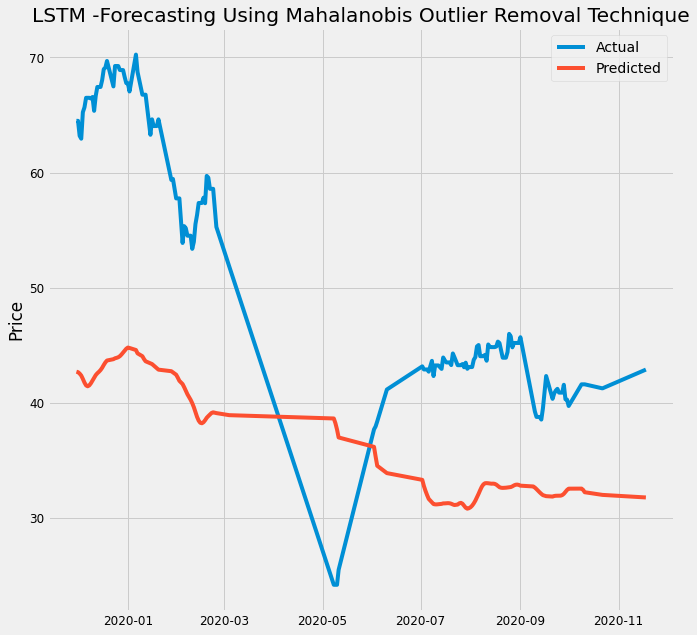

In [60]:
result_metrics_forecast(mah_out_actual,mah_out_pred,'LSTM','Mahalanobis')

In [61]:
##Forecasting Vanilla Model-Without Outlier Removal
lstm_model(sc1,van_train,8)

Shape of Input Data Initially (2740, 8)
Shape of Train Part after transformation (2679, 60, 1, 8)
Shape of Test Part after transformation  (2679,)
Final Shape  (2679, 60, 8)
Epoch 1/50
84/84 [==============================] - 7s 79ms/step - loss: 0.0293
Epoch 2/50
84/84 [==============================] - 7s 83ms/step - loss: 0.0077
Epoch 3/50
84/84 [==============================] - 7s 82ms/step - loss: 0.0062
Epoch 4/50
84/84 [==============================] - 7s 78ms/step - loss: 0.0054
Epoch 5/50
84/84 [==============================] - 7s 79ms/step - loss: 0.0049
Epoch 6/50
84/84 [==============================] - 6s 72ms/step - loss: 0.0052
Epoch 7/50
84/84 [==============================] - 6s 75ms/step - loss: 0.0043
Epoch 8/50
84/84 [==============================] - 7s 89ms/step - loss: 0.0043
Epoch 9/50
84/84 [==============================] - 7s 82ms/step - loss: 0.0040
Epoch 10/50
84/84 [==============================] - 6s 70ms/step - loss: 0.0038
Epoch 11/50
84/84 [======

In [62]:
prepare_test_data_lstm(sc1,van_test,8)

Shape of Test Dataset (244, 60, 8)


In [63]:
predict_data(model,sc2,van_test,X_test,'Vanilla Model',8)

244


Predicted -Vanilla Model
0                   46.314602
1                   46.282936
2                   46.264130
3                   46.266094
4                   46.288715
..                        ...
239                 53.598507
240                 53.885864
241                 54.068977
242                 54.155102
243                 54.161362

[244 rows x 1 columns]

In [64]:
van_pred = pred_df.copy()
van_actual = van_test.iloc[61:,0].copy()

Result Metrics for LSTM -Vanilla Model-No Outlier Removal Technique
R2 Score :  0.346
Mean Squared Error :  50.917
Mean Absolute Error :  5.834


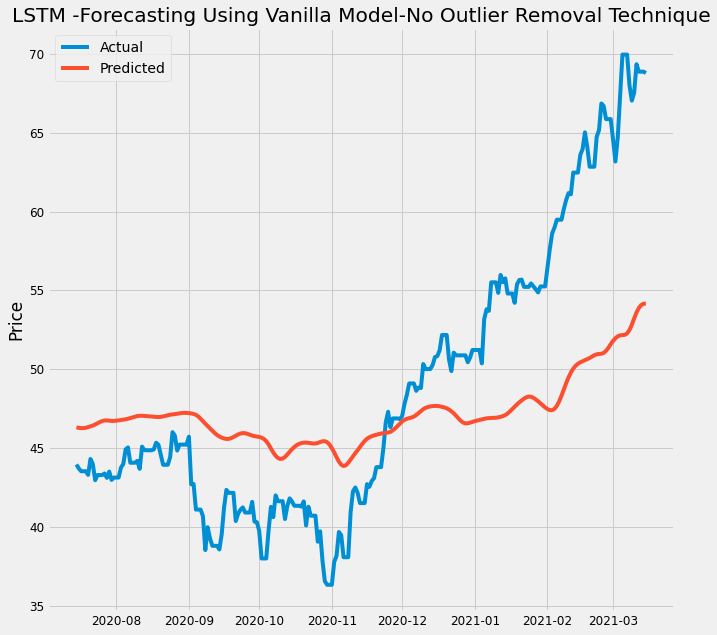

In [65]:
result_metrics_forecast(van_actual,van_pred,'LSTM','Vanilla Model-No')

No handles with labels found to put in legend.


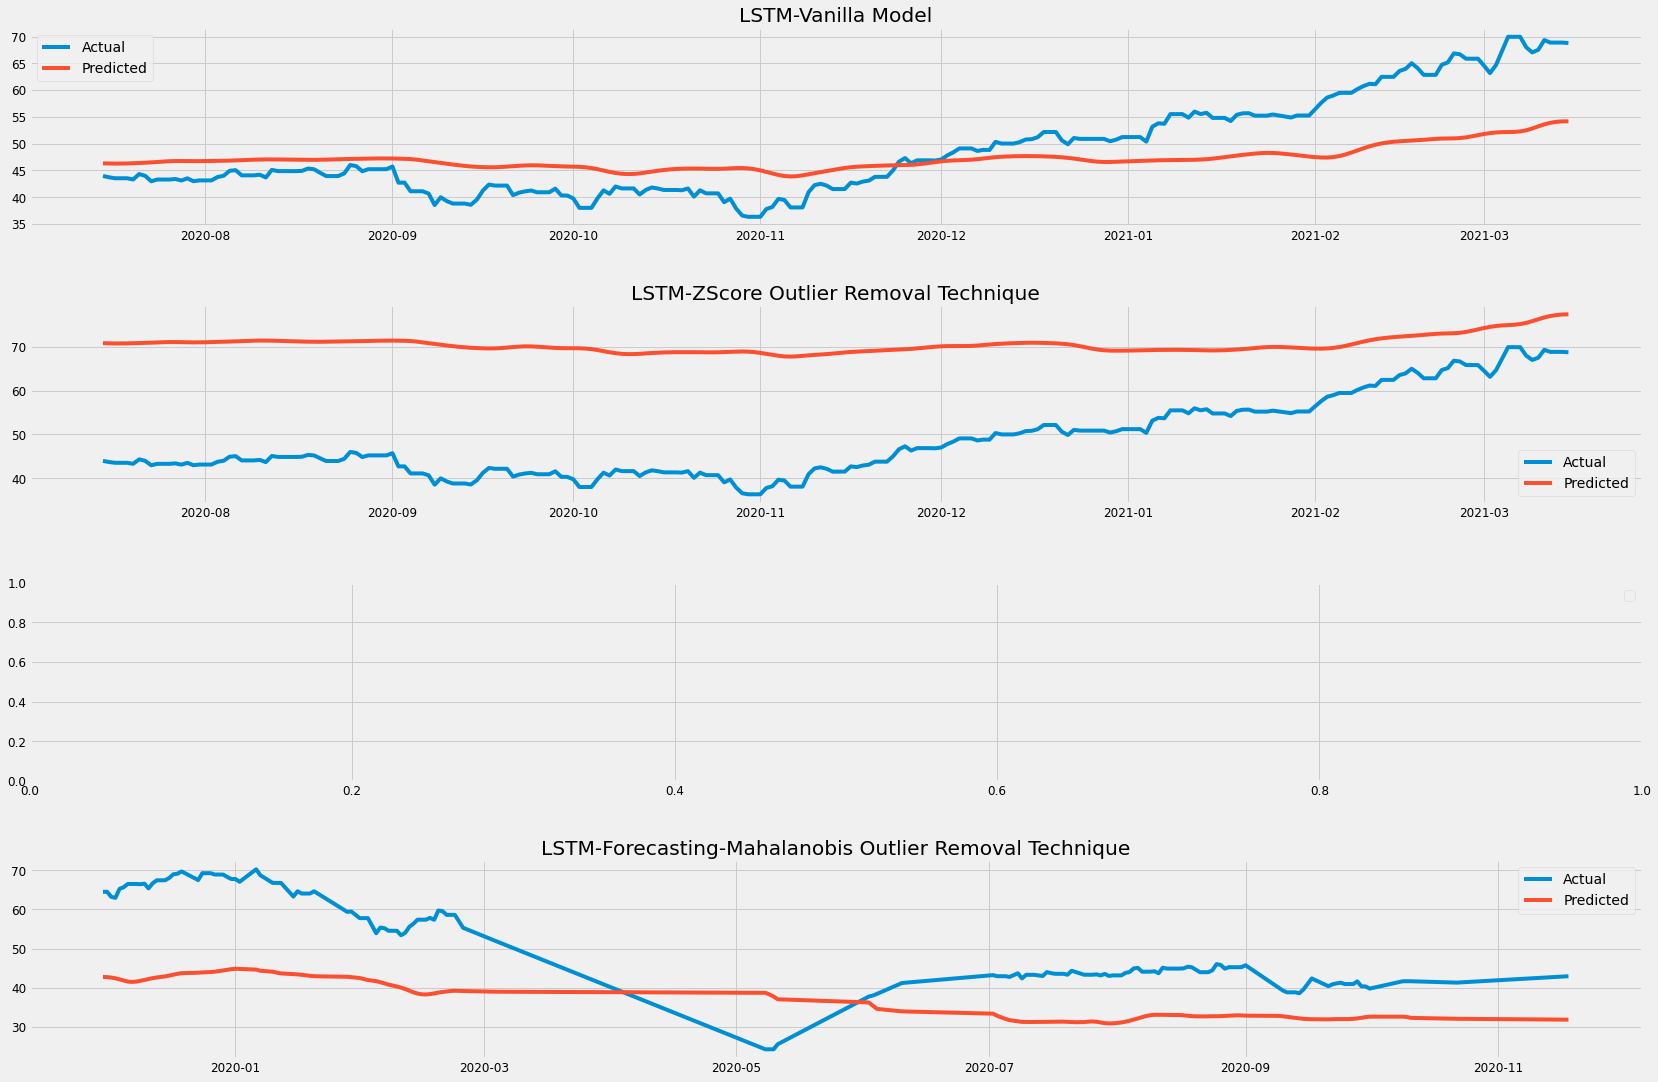

In [66]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,figsize=(24,16))

ax1.plot(van_actual.index,van_actual,label='Actual')
ax1.plot(van_actual.index,van_pred,label='Predicted')
plt.title('Forecasting-No Outlier Removal Technique')
ax1.set_title('LSTM-Vanilla Model')

ax2.plot(z_out_actual.index,z_out_actual,label='Actual')
ax2.plot(z_out_actual.index,z_out_pred,label='Predicted')
ax2.set_title('LSTM-ZScore Outlier Removal Technique')

ax4.plot(mah_out_actual.index,mah_out_actual,label='Actual')
ax4.plot(mah_out_actual.index,mah_out_pred,label='Predicted')
ax4.set_title('LSTM-Forecasting-Mahalanobis Outlier Removal Technique')

ax1.legend()
ax2.legend()
ax4.legend()

plt.tight_layout(pad=3)